## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: his lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
df=pd.read_csv("C:/Users/Amin/Documents/amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [2]:
df_crosstab=pd.crosstab(df['category'],df['isBestSeller'])
df_crosstab.sort_values(by=True,ascending=False)

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Downhill Ski Boots,1284,0
Digital Frames,774,0
Motorbike Chassis,107,0


In [3]:
crosstab_result=pd.crosstab(df['category'],df['isBestSeller'], normalize='index') *100
crosstab_result.columns=['Not Best-Seller (%)', 'Best-Seller (%)']
#Sorting categories by proportion
sorted_crosstab_result=crosstab_result.sort_values(by='Best-Seller (%)', ascending=False)
sorted_crosstab_result

,Not Best-Seller (%),Best-Seller (%)
category,,
Grocery,94.186533,5.813467
Smart Home Security & Lighting,94.230769,5.769231
Health & Personal Care,94.231372,5.768628
Mobile Phone Accessories,95.752896,4.247104
Power & Hand Tools,96.466105,3.533895
...,...,...
"CD, Disc & Tape Players",100.000000,0.000000
General Music-Making Accessories,100.000000,0.000000
Snowboard Boots,100.000000,0.000000


In [4]:
# #Yes, there are categories where being a best-seller is more prevalent.
# Grocery → 5.81% of products are best-sellers
# Smart Home Security & Lighting → 5.77% best-sellers
# Health & Personal Care → 5.77% best-sellers
# Mobile Phone Accessories → 4.25% best-sellers
# Power & Hand Tools → 3.53% best-sellers

2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [5]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(df_crosstab)

chi2_statistic, chi2_p_value

print(f"Chi-square Statistic: {chi2_statistic}")
print(f"P-value: {chi2_p_value}")

Chi-square Statistic: 36540.20270061387
P-value: 0.0


In [6]:
#Since the p-value is 0 which is less than the significance level of 0.05, which means there is a relationship between best-seller distribution and product category.
#In other words the best-seller distribution is not independent of the product category.

In [7]:
from scipy.stats.contingency import association

# Computing the association between variables in 'df_crosstab' using the "cramer" method
cramer_method = association(df_crosstab, method="cramer")

print(f"Cramér's V: {cramer_method}")

Cramér's V: 0.1222829439760564


In [8]:
#The Cramér's= 0.1223 suggests a weak association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

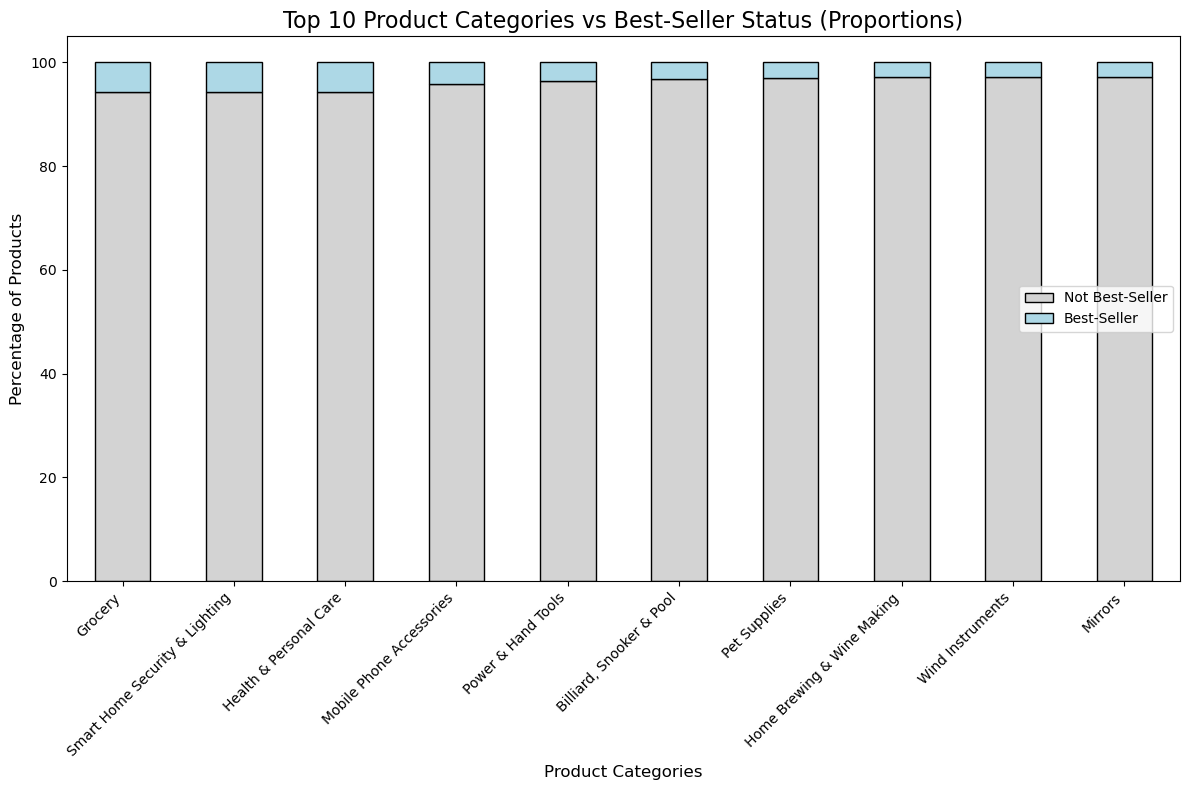

In [9]:
#Visualizing the relationship between product categories and the best seller status using stacked bar chart for all the categeries is difficult to understand so we want to limit it.
#Additionally it is more likely to see a visible relationship if we visualize the categories by proportion.
# Limiting to the top N categories for better visualization 
top_n = 10
sorted_crosstab_result_top = sorted_crosstab_result.head(top_n)

# Plotting the stacked bar chart
sorted_crosstab_result_top.plot(kind='bar', stacked=True, figsize=(12, 8), color=['lightgrey', 'lightblue'], edgecolor='black')


plt.title(f'Top {top_n} Product Categories vs Best-Seller Status (Proportions)', fontsize=16)
plt.xlabel('Product Categories', fontsize=12)
plt.ylabel('Percentage of Products', fontsize=12)
plt.legend(['Not Best-Seller', 'Best-Seller'], loc='center right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

In [12]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]



1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.


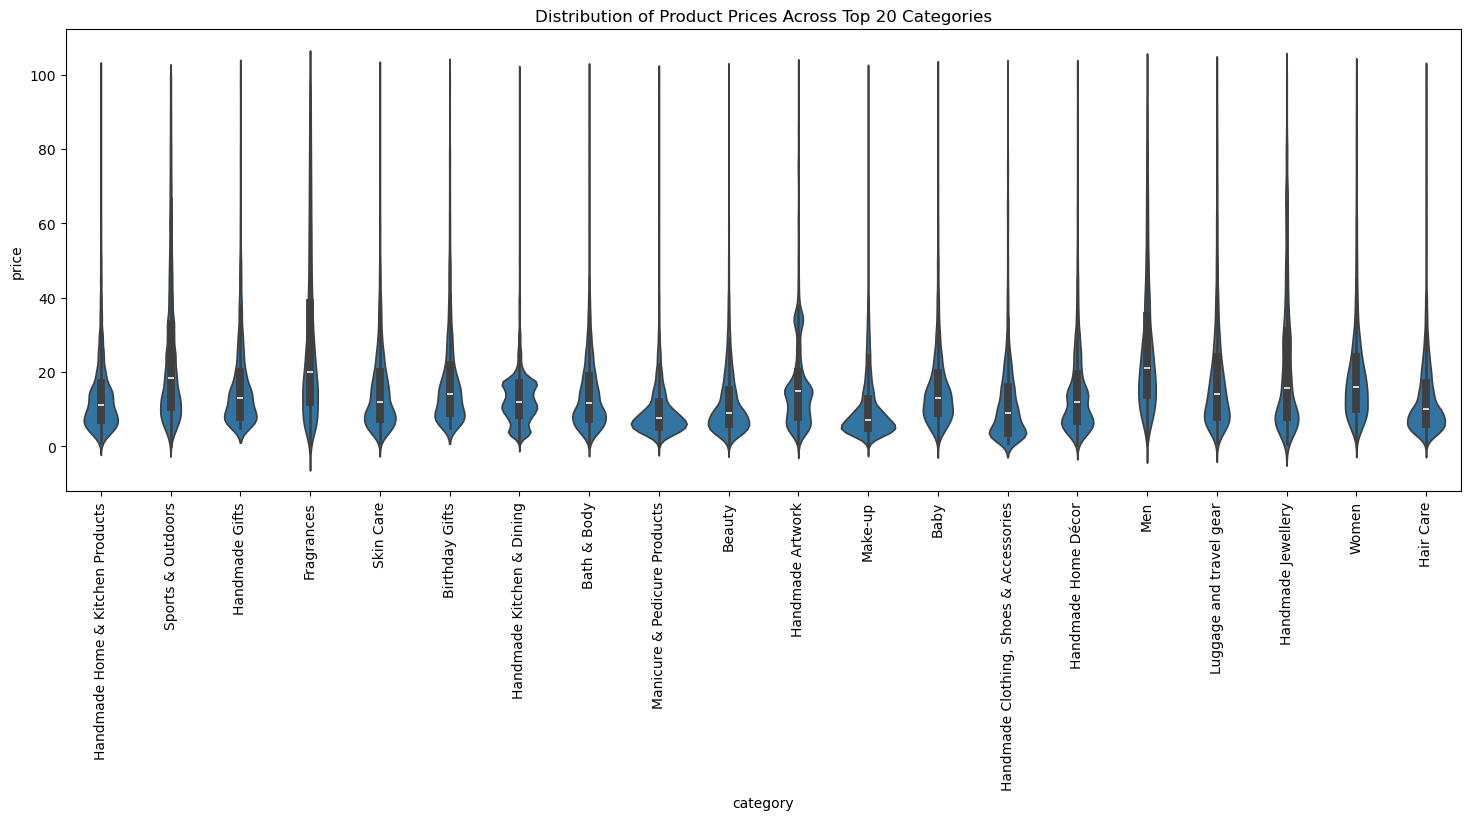

In [22]:
top_20_categories = df_filtered['category'].value_counts().nlargest(20).index
df_top_20 = df_filtered[df_filtered['category'].isin(top_20_categories)]

# Plot
plt.figure(figsize=(18, 6))
sns.violinplot(x='category', y='price', data=df_top_20)
plt.xticks(rotation=90)
plt.title('Distribution of Product Prices Across Top 20 Categories')
plt.show()

In [23]:
#Highest median
median_prices = df_filtered.groupby('category')['price'].median()
highest_median_category = median_prices.idxmax()
highest_median_price = median_prices.max()

print(highest_median_category)
print(highest_median_price)

Desktop PCs
74.0


2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

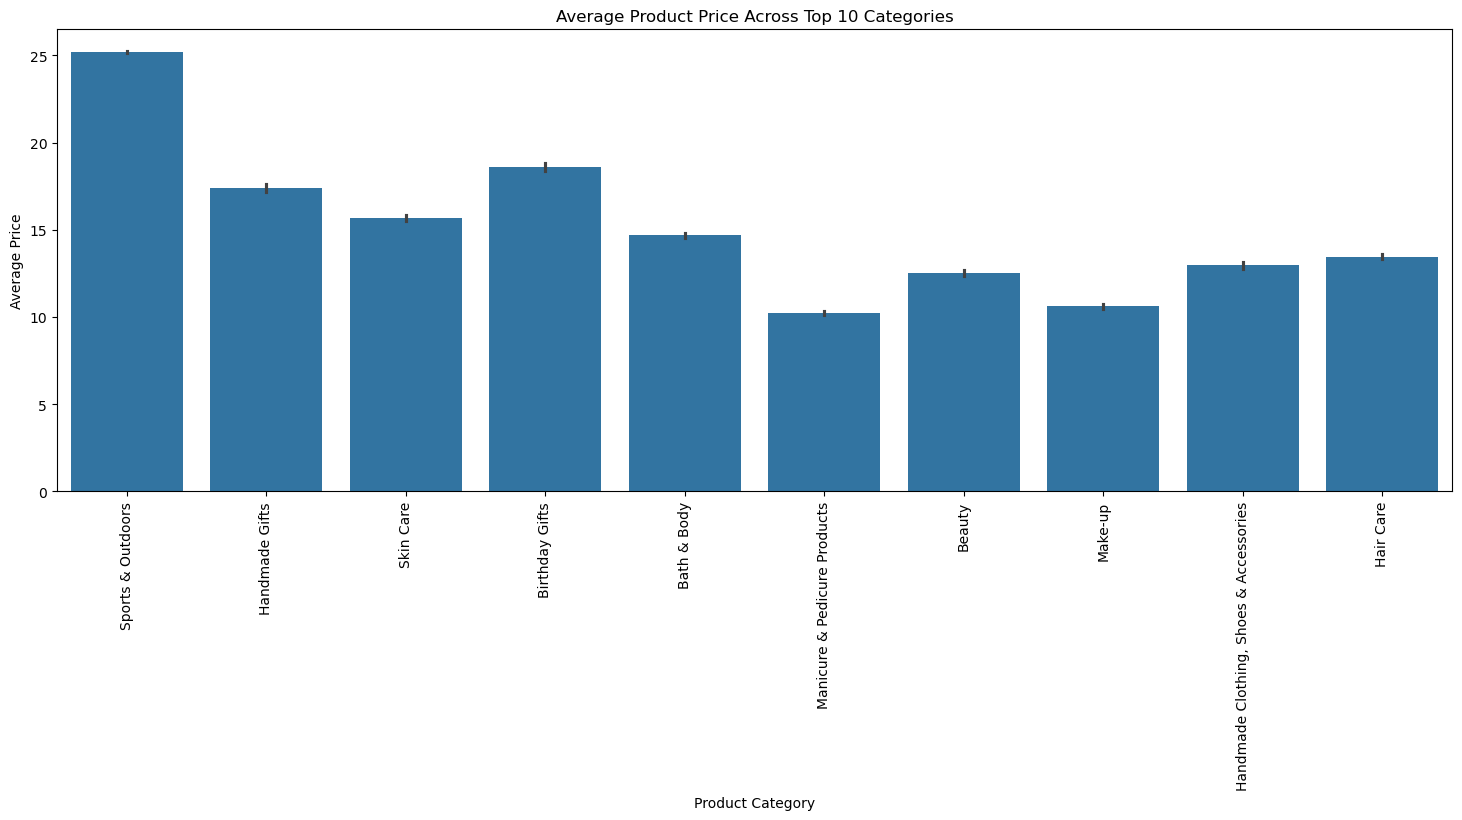

In [34]:
top_10_categories= df_filtered['category'].value_counts().nlargest(10).index
df_top_10=df_filtered[df_filtered['category'].isin(top_10_categories)]

#Bar plot
plt.figure(figsize=(18, 6))
sns.barplot(x='category', y='price', data=df_top_10, estimator='mean')
plt.xticks(rotation=90) 
plt.title('Average Product Price Across Top 10 Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.show()

In [28]:
#Highest average price
average_prices = df_filtered.groupby('category')['price'].mean()
highest_avg_category = average_prices.idxmax()
highest_avg_price = average_prices.max()

print(highest_avg_category)
print(highest_avg_price)

Motherboards
68.77243243243242


3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

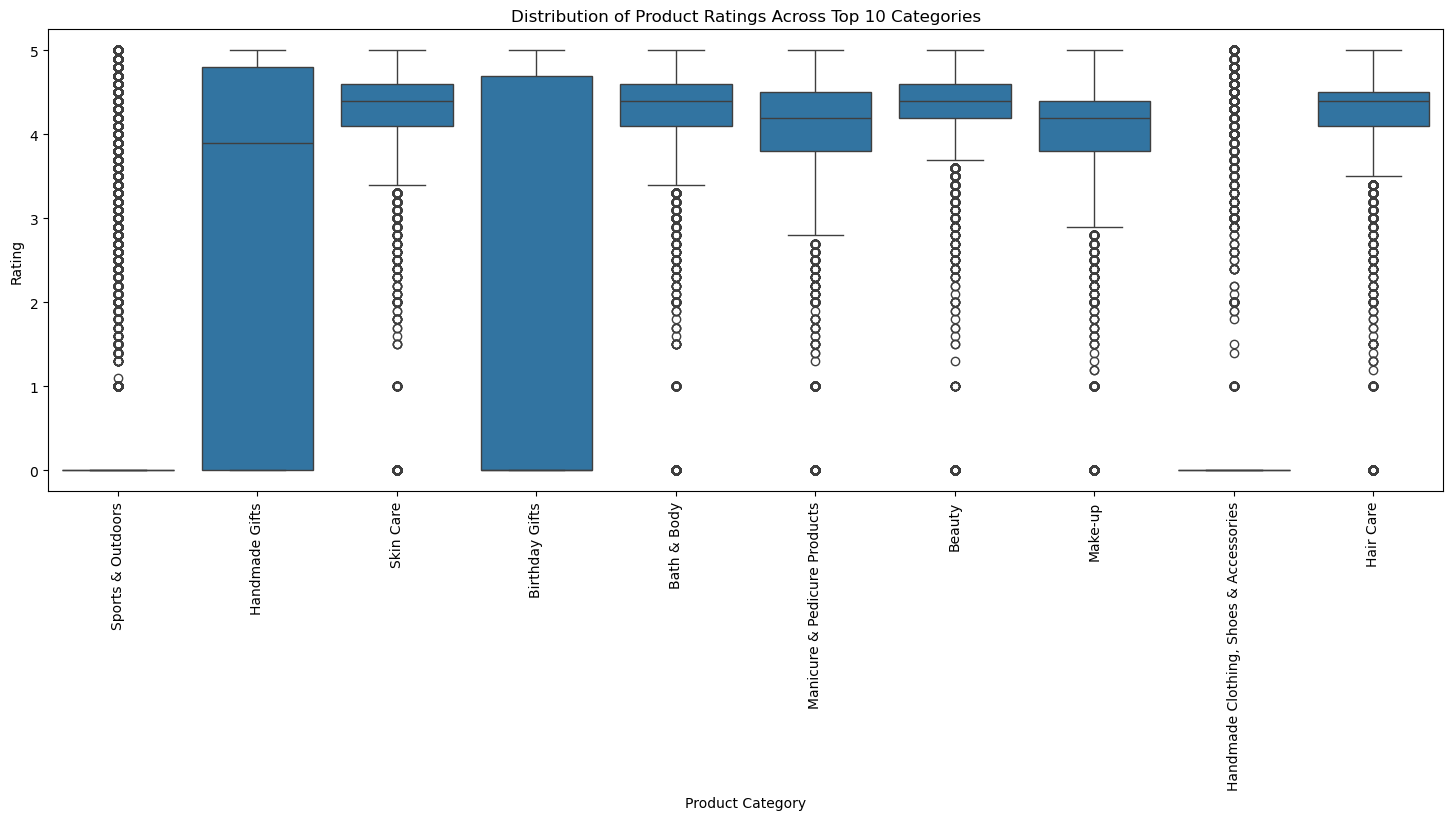

In [31]:
top_10_categories = df_filtered['category'].value_counts().nlargest(10).index
df_top_10 = df_filtered[df_filtered['category'].isin(top_10_categories)]

#Box plot
plt.figure(figsize=(18, 6))
sns.boxplot(x='category', y='stars', data=df_top_10)
plt.xticks(rotation=90)  
plt.title('Distribution of Product Ratings Across Top 10 Categories')
plt.xlabel('Product Category')
plt.ylabel('Rating')
plt.show()

In [33]:
#Highest median rating
median_ratings = df_filtered.groupby('category')['stars'].median()
highest_median_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()

print(highest_median_category)
print(highest_median_rating)

Computer Memory
4.7


### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?

In [36]:
#Correlation cofficient
correlation = df_filtered['price'].corr(df_filtered['stars'])
correlation

-0.07767299878178476

In [ ]:
#The correlation coefficient between product prices and ratings (-0.0777) is very close to 0, indicating a very weak negative correlation between the two variables.

2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 


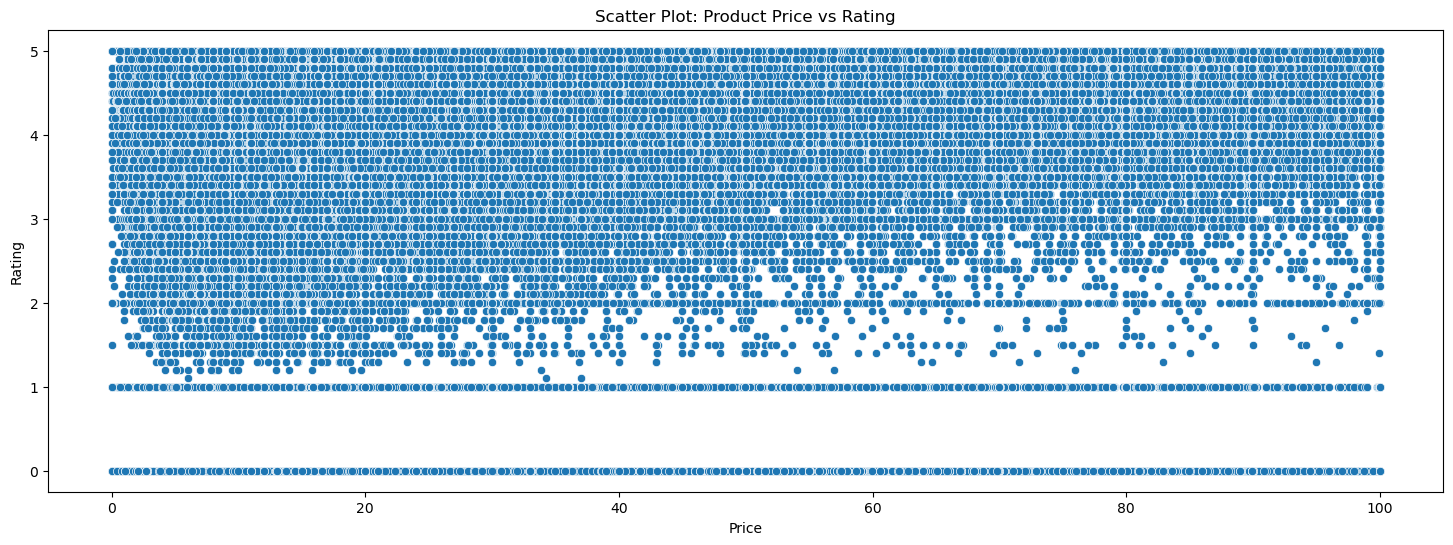

In [38]:
# Scatter plot
plt.figure(figsize=(18, 6))
sns.scatterplot(x='price', y='stars', data=df_filtered)
plt.title('Scatter Plot: Product Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

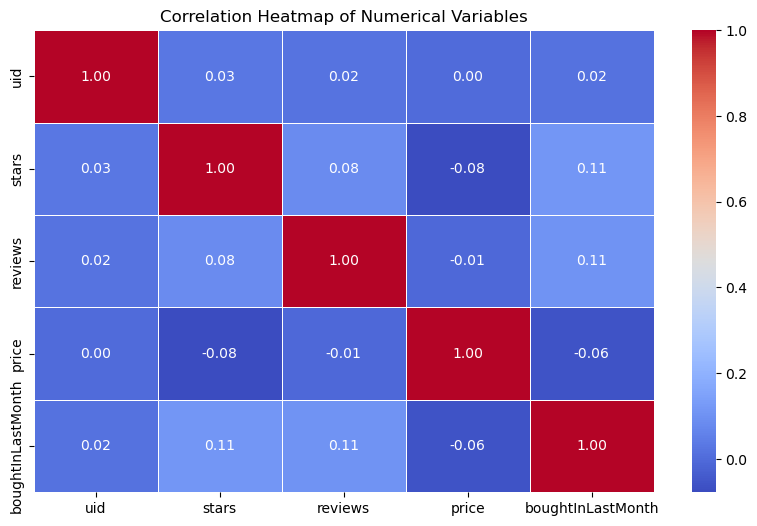

In [ ]:

numerical_cols = df_filtered.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_filtered[numerical_cols].corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

<Figure size 800x600 with 0 Axes>

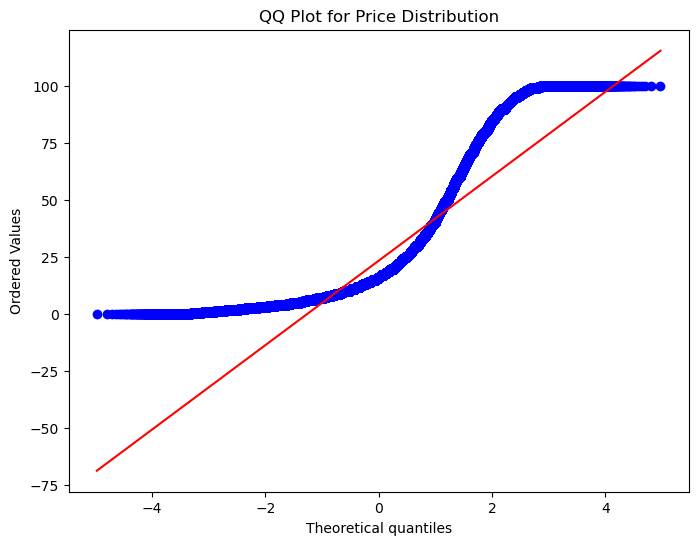

In [41]:
# QQ plot to check if the price follows a normal distribution
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(df_filtered['price'].dropna(), dist="norm", plot=plt)
plt.title('QQ Plot for Price Distribution')
plt.show()

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?
